In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
#tickers = pd.read_html('https://www1.nseindia.com/live_market/dynaContent/live_watch/equities_stock_watch.htm')

In [3]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]

In [4]:
tickers.head()

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS,Infrastructure
1,Apollo Hospitals,APOLLOHOSP,Healthcare
2,Asian Paints,ASIANPAINT,Consumer Goods
3,Axis Bank,AXISBANK,Banking
4,Bajaj Auto,BAJAJ-AUTO,Automobile


In [5]:
import datetime

In [6]:
end_date = datetime.date.today()
start_date = end_date - pd.Timedelta(days = 10 * 365)

In [7]:
tickers_list = [ticker+'.NS' for ticker in tickers['Symbol'].to_list()]

In [8]:
tickers_list.append('^NSEI')

In [9]:
len(tickers_list)

51

In [10]:
nifty_stock_data = yf.download(tickers=tickers_list, start=start_date, end=end_date, auto_adjust=True)['Close']

[*********************100%***********************]  51 of 51 completed


In [11]:
nifty_stock_data.tail()

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-08,801.650024,4427.350098,3458.449951,745.549988,4022.649902,15530.650391,7342.200195,704.349976,325.649994,3631.399902,...,788.700012,468.250000,107.199997,3374.449951,1056.599976,2446.949951,6677.850098,749.150024,435.850006,17525.099609
2022-08-10,790.549988,4517.149902,3411.649902,739.000000,4034.850098,15643.200195,7149.399902,715.250000,328.299988,3647.750000,...,790.549988,475.549988,109.199997,3354.250000,1055.199951,2433.600098,6595.649902,765.299988,430.149994,17534.750000
2022-08-11,792.750000,4429.649902,3405.199951,758.849976,4033.500000,15736.950195,7318.950195,709.799988,328.350006,3640.300049,...,773.450012,476.649994,109.099998,3422.500000,1077.250000,2472.350098,6597.100098,767.500000,438.450012,17659.000000
2022-08-12,788.349976,4312.750000,3427.850098,760.549988,4038.000000,15765.450195,7309.399902,709.700012,333.899994,3659.750000,...,763.450012,477.549988,112.650002,3401.550049,1065.900024,2471.949951,6559.299805,788.900024,436.100006,17698.150391
2022-08-16,824.150024,4349.399902,3501.000000,764.650024,4091.149902,15915.750000,7286.100098,704.099976,345.899994,3690.449951,...,779.500000,489.850006,113.000000,3392.699951,1077.699951,2493.850098,6656.000000,788.549988,437.100006,17825.250000


In [12]:
nifty_stock_data.pct_change().isnull().sum()

ADANIPORTS.NS       1
APOLLOHOSP.NS       1
ASIANPAINT.NS       1
AXISBANK.NS         1
BAJAJ-AUTO.NS       1
BAJAJFINSV.NS       1
BAJFINANCE.NS       1
BHARTIARTL.NS       1
BPCL.NS             1
BRITANNIA.NS        1
CIPLA.NS            1
COALINDIA.NS        1
DIVISLAB.NS         1
DRREDDY.NS          1
EICHERMOT.NS        1
GRASIM.NS           1
HCLTECH.NS          1
HDFC.NS             1
HDFCBANK.NS         1
HDFCLIFE.NS      1290
HEROMOTOCO.NS       1
HINDALCO.NS         1
HINDUNILVR.NS       1
ICICIBANK.NS        1
INDUSINDBK.NS       1
INFY.NS             1
ITC.NS              1
JSWSTEEL.NS         1
KOTAKBANK.NS        1
LT.NS               1
M&M.NS              1
MARUTI.NS           1
NESTLEIND.NS        1
NTPC.NS             1
ONGC.NS             1
POWERGRID.NS        1
RELIANCE.NS         1
SBILIFE.NS       1258
SBIN.NS             1
SHREECEM.NS         1
SUNPHARMA.NS        1
TATACONSUM.NS       1
TATAMOTORS.NS       1
TATASTEEL.NS        1
TCS.NS              1
TECHM.NS  

In [13]:
# for HDFC LIFE AND SBILIFE not enough data for 10 years, therefore removing the 2 stocks from the stock list

In [14]:
nifty_stock_data_updated = nifty_stock_data.drop(['HDFCLIFE.NS', 'SBILIFE.NS', 'TATASTEEL.NS'], axis=1)

In [15]:
nifty_stock_data_updated.head()

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-21,113.731430,604.678345,342.500885,210.347580,1311.572754,912.839355,100.518135,225.172989,68.036903,208.206268,...,314.935608,116.165085,240.812973,535.900696,178.689529,210.347275,1658.954102,66.251244,121.626671,5421.000000
2012-08-22,110.599907,608.723328,342.310791,209.836212,1320.993896,902.317871,101.074142,216.551025,70.075508,208.382080,...,314.202332,115.203598,242.671402,533.012146,175.954697,210.300171,1675.071533,64.469490,121.199326,5412.850098
2012-08-23,105.143448,614.838989,343.047913,207.307938,1309.925781,859.160217,101.013405,216.855835,70.527412,210.249908,...,316.141937,114.504341,239.932678,546.134644,178.000702,210.064713,1666.240601,66.013672,124.139580,5415.350098
2012-08-24,106.282188,614.213013,340.873688,203.671799,1310.845093,803.678589,101.036758,215.941376,71.210281,213.084595,...,314.864624,112.625069,240.666260,545.887207,179.172775,209.263977,1663.441772,67.439072,124.823334,5386.700195
2012-08-27,102.486404,602.511414,339.547852,196.787766,1318.466309,771.334595,101.382523,216.986465,71.099823,215.150162,...,316.922424,112.275436,235.775650,544.896423,179.943848,208.604553,1690.272217,68.419037,123.507050,5350.250000


In [16]:
data_pct_change = nifty_stock_data_updated.pct_change().dropna()

In [17]:
data_pct_change.head(10)

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-22,-0.027534,0.006689,-0.000555,-0.002431,0.007183,-0.011526,0.005531,-0.038290,0.029963,0.000844,...,-0.002328,-0.008277,0.007717,-0.005390,-0.015305,-0.000224,0.009715,-0.026894,-0.003514,-0.001503
2012-08-23,-0.049335,0.010047,0.002153,-0.012049,-0.008379,-0.047830,-0.000601,0.001408,0.006449,0.008963,...,0.006173,-0.006070,-0.011286,0.024620,0.011628,-0.001120,-0.005272,0.023952,0.024260,0.000462
2012-08-24,0.010830,-0.001018,-0.006338,-0.017540,0.000702,-0.064577,0.000231,-0.004217,0.009682,0.013482,...,-0.004040,-0.016412,0.003057,-0.000453,0.006585,-0.003812,-0.001680,0.021592,0.005508,-0.005290
2012-08-27,-0.035714,-0.019051,-0.003890,-0.033800,0.005814,-0.040245,0.003422,0.004840,-0.001551,0.009694,...,0.006536,-0.003104,-0.020321,-0.001815,0.004304,-0.003151,0.016129,0.014531,-0.010545,-0.006767
2012-08-28,0.007870,0.009671,0.017394,-0.021028,-0.017545,0.005431,-0.017974,-0.001405,0.000706,-0.002247,...,0.017016,-0.004282,-0.015557,0.023061,-0.036739,-0.000677,-0.009650,0.006511,0.006644,0.000000
2012-08-29,0.005512,-0.007520,-0.006361,0.001180,-0.039204,-0.038942,-0.026093,-0.026125,-0.005928,-0.001024,...,-0.007705,-0.021110,-0.016435,-0.005626,-0.009550,0.001130,-0.009888,0.003450,0.001375,-0.011672
2012-08-30,0.046140,0.011644,-0.001593,-0.005106,0.003908,0.029214,0.019853,0.002270,-0.011784,0.003177,...,-0.005990,0.040735,0.014353,0.017754,-0.050126,0.002257,-0.002766,0.027073,0.013319,0.005153
2012-08-31,-0.006550,-0.008988,-0.015056,-0.021169,-0.008583,0.011176,-0.008647,0.020383,-0.037787,0.023493,...,-0.005431,-0.003837,-0.010348,-0.017116,0.006998,-0.007656,-0.010890,0.000837,-0.017344,-0.010640
2012-09-03,0.021978,0.000159,0.002829,-0.014317,0.028012,0.005715,-0.001525,-0.003834,0.018068,0.006686,...,-0.002394,0.004622,-0.014511,-0.004390,0.014964,0.016338,-0.016648,-0.001672,0.004413,-0.000903


In [18]:
import statsmodels.api as sm

In [19]:
def calculate_beta(y, x):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.params[0]

In [20]:
#nifty_data = yf.download(tickers='^NSEI', start=start_date, end=end_date, auto_adjust=True)['Close']

In [21]:
#nifty_data.head()

In [22]:
#nifty_data_pct_change = nifty_data.pct_change().dropna()

In [23]:
#nifty_data_pct_change.tail()

In [24]:
beta = pd.DataFrame(index=[0])

In [25]:
for ticker in data_pct_change.columns:
    beta[ticker] = calculate_beta(data_pct_change.loc[:'2019', ticker], data_pct_change.loc[:'2019', '^NSEI'])

In [26]:
beta = beta.T
beta.columns = ['beta']

In [27]:
beta

,beta
ADANIPORTS.NS,1.278239
APOLLOHOSP.NS,0.660138
ASIANPAINT.NS,0.878025
AXISBANK.NS,1.429235
BAJAJ-AUTO.NS,0.817820
BAJAJFINSV.NS,0.923342
BAJFINANCE.NS,1.100275
BHARTIARTL.NS,0.890497
BPCL.NS,1.148828
BRITANNIA.NS,0.629938


<AxesSubplot:>

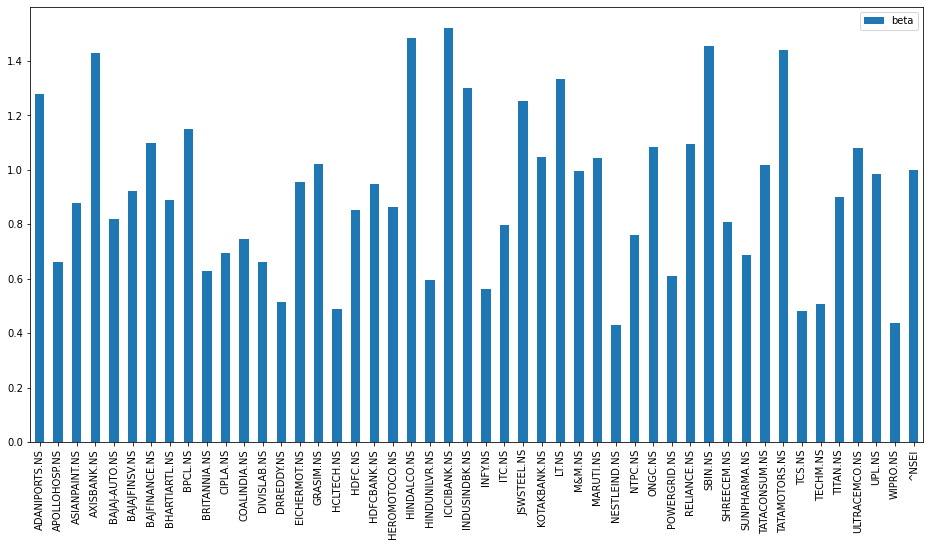

In [28]:
beta.plot.bar(figsize=(16,8))

In [29]:
low_beta = beta[beta.values < 0.7].index

In [30]:
low_beta

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS',
       'DRREDDY.NS', 'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS',
       'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

In [31]:
#stock_returns = data_pct_change.loc['2018': , low_beta]
#por = stock_returns.mean(axis=1)
#por

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_performance(stock_list, strategy_name):
    stock_returns = data_pct_change.loc['2020': , stock_list]
    (stock_returns + 1).cumprod().plot(figsize=(15,7), legend="left")
    plt.title(strategy_name)
    plt.show()
    
    nifty = data_pct_change.loc['2020': , '^NSEI']
    portfolio = stock_returns.mean(axis=1)
    plt.title(strategy_name + ' Portfolio Performance')
    (portfolio + 1).cumprod().plot(figsize=(15,7), label=strategy_name, color='purple')
    (nifty + 1).cumprod().plot(figsize=(15,7), label='Nifty', color='blue')
    plt.legend()
    plt.show()
    print("Portfolio Returns: ", (((portfolio + 1).cumprod()[-1]) - 1) * 100) 
    print("Nifty Returns: ", (((nifty + 1).cumprod()[-1]) - 1) * 100) 
    return portfolio

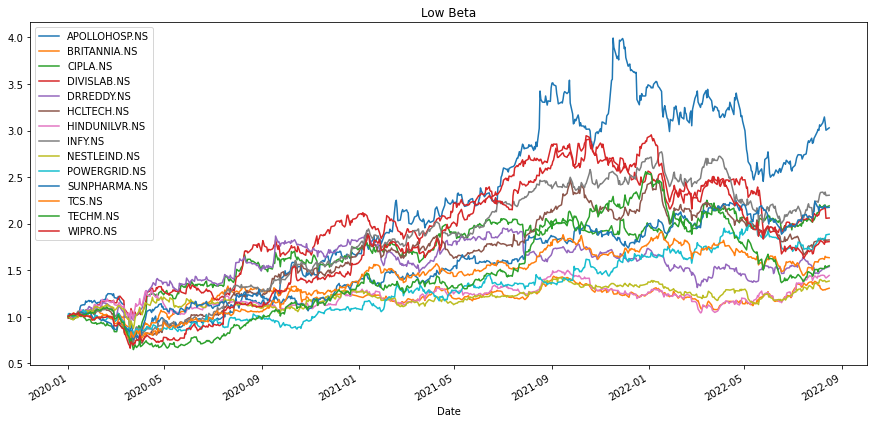

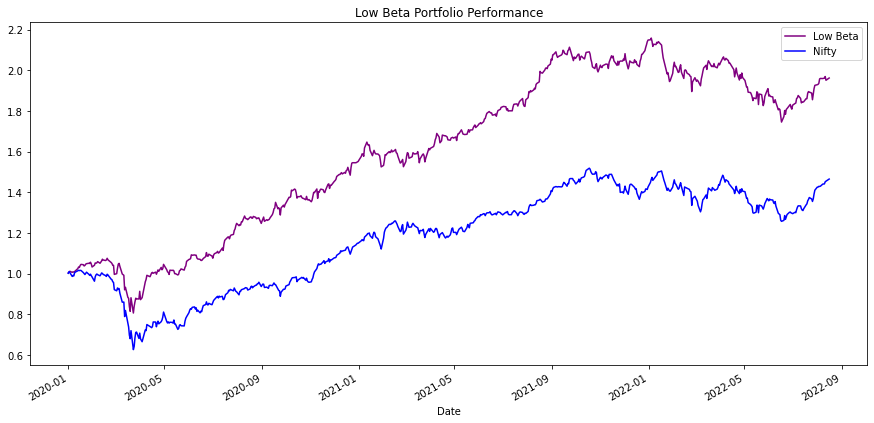

Portfolio Returns:  96.21745862276516
Nifty Returns:  46.48743031274935


In [34]:
p_low_beta = plot_performance(low_beta, 'Low Beta')

In [35]:
high_beta = beta[beta.values > 1.2].index
high_beta

Index(['ADANIPORTS.NS', 'AXISBANK.NS', 'HINDALCO.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'JSWSTEEL.NS', 'LT.NS', 'SBIN.NS', 'TATAMOTORS.NS'],
      dtype='object')

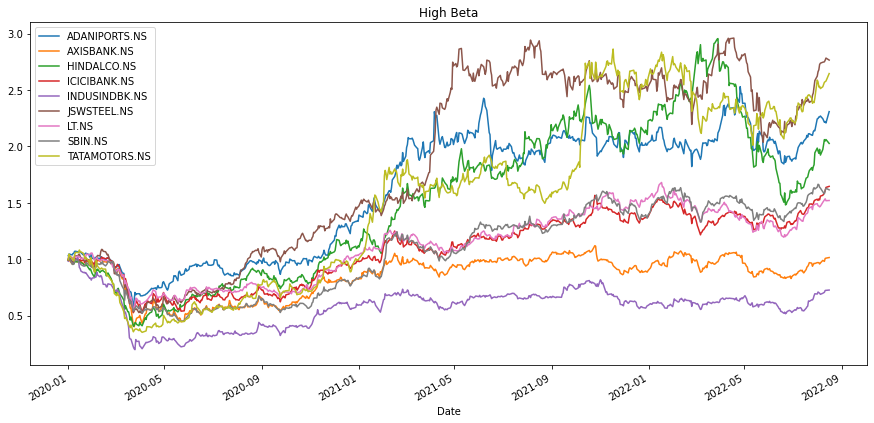

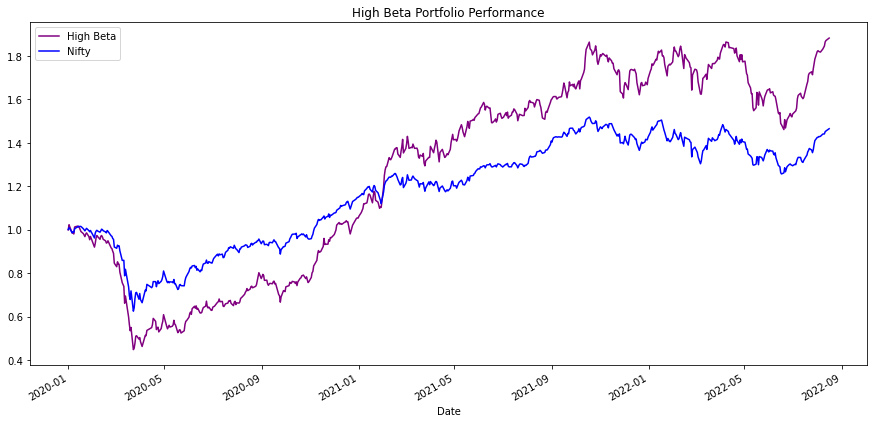

Portfolio Returns:  88.1926569846656
Nifty Returns:  46.48743031274935


In [36]:
p_high_beta = plot_performance(high_beta, "High Beta")

In [37]:
min(beta['beta'])

0.4318174176680152

In [38]:
low_beta_threshold = [ 0.5, 0.6, 0.7, 0.8]

In [39]:
def mutiple_low_beta():
    for beta_val in low_beta_threshold:
        print("Beta Value: ", beta_val)
        low_beta = beta[beta.values < beta_val].index
        plot_performance(low_beta, 'Low Beta')
        print("-----------------------------------------------------------------------------------")

Beta Value:  0.5


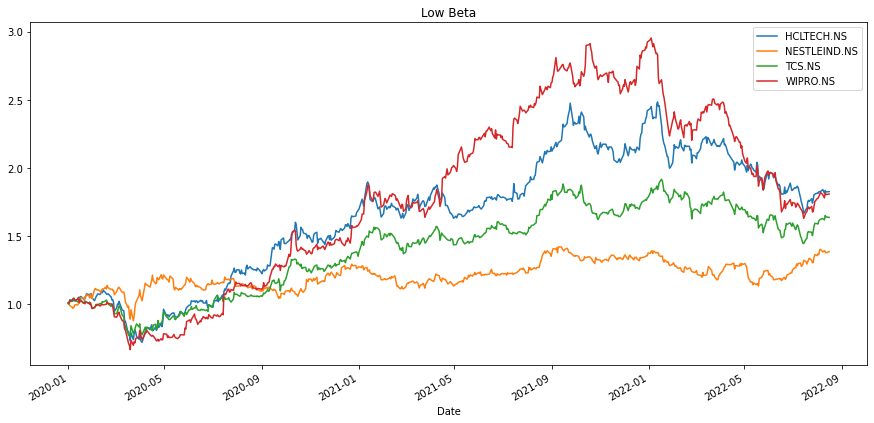

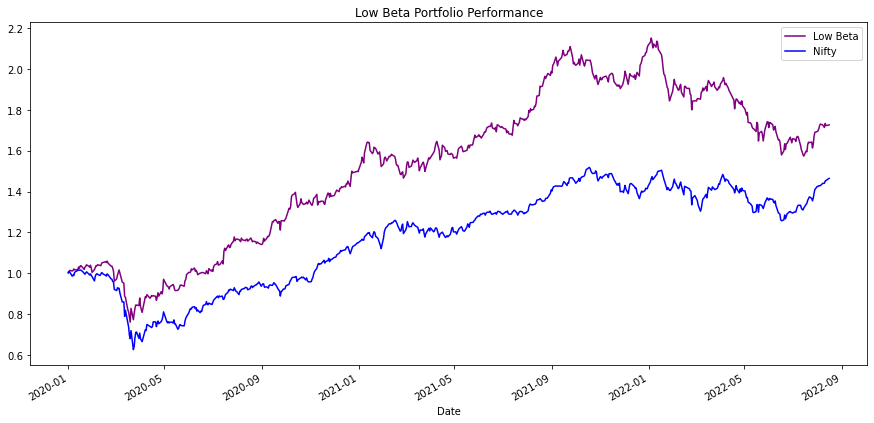

Portfolio Returns:  72.69137250718258
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------
Beta Value:  0.6


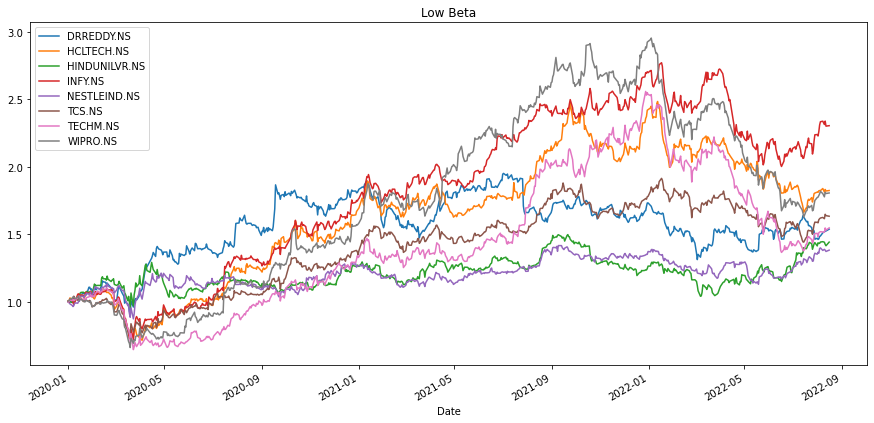

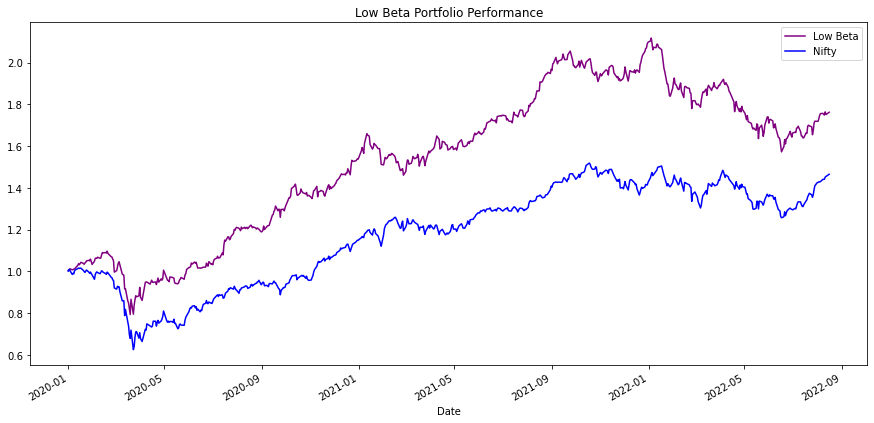

Portfolio Returns:  76.17041100840412
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------
Beta Value:  0.7


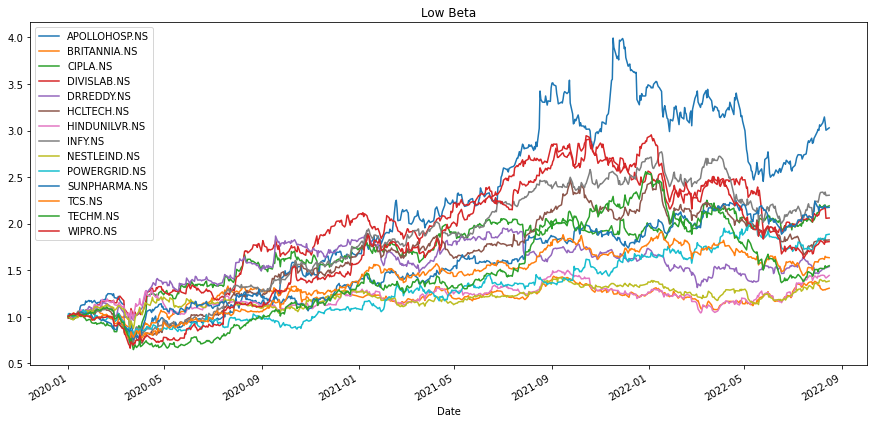

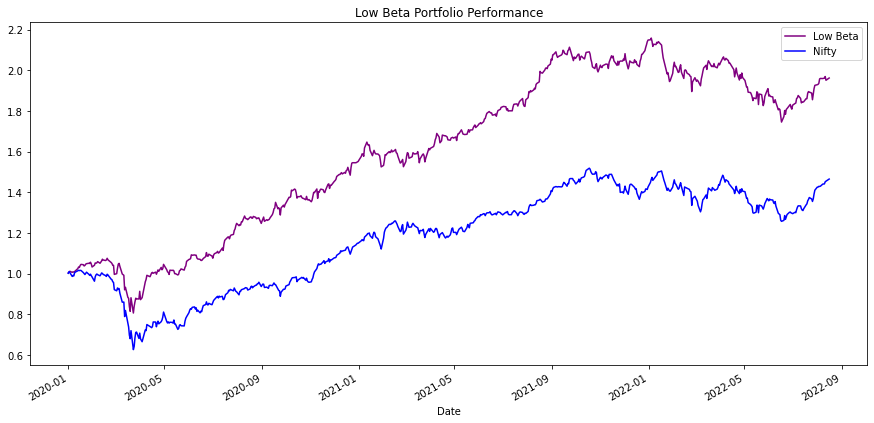

Portfolio Returns:  96.21745862276516
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------
Beta Value:  0.8


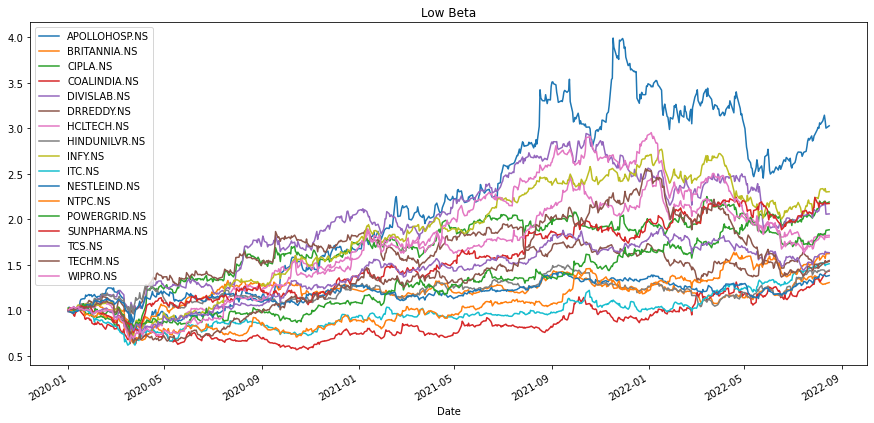

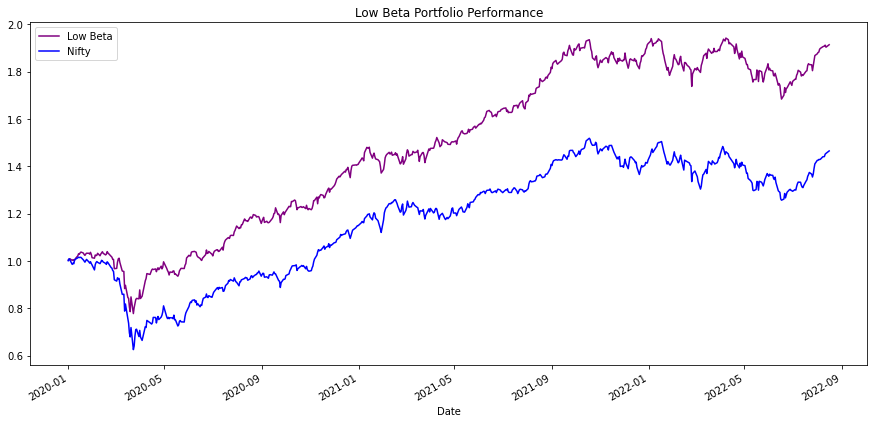

Portfolio Returns:  91.35323553496417
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------


In [40]:
mutiple_low_beta()

In [41]:
max(beta['beta'])

1.5218847233218495

In [43]:
high_beta_threshold = [ 1.2, 1.3, 1.4, 1.5]

In [45]:
def multiple_high_beta():
    for beta_val in high_beta_threshold:
        print("Beta Value: ", beta_val)
        high_beta = beta[beta.values > beta_val].index
        plot_performance(high_beta, 'High Beta')
        print("-----------------------------------------------------------------------------------")

Beta Value:  1.2


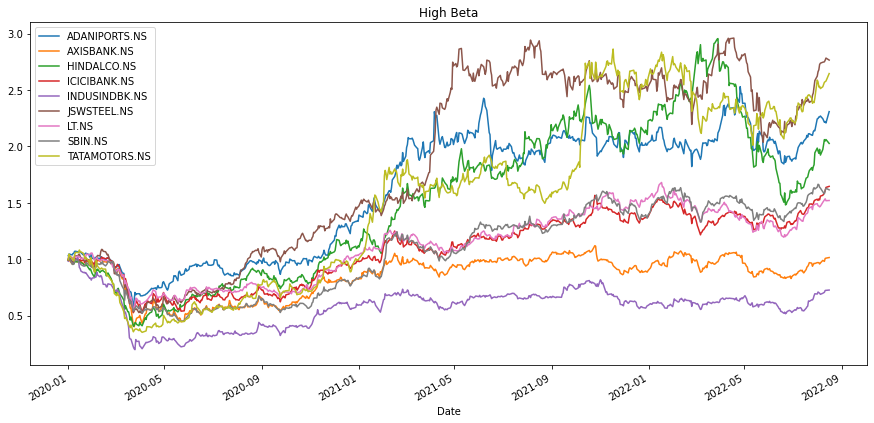

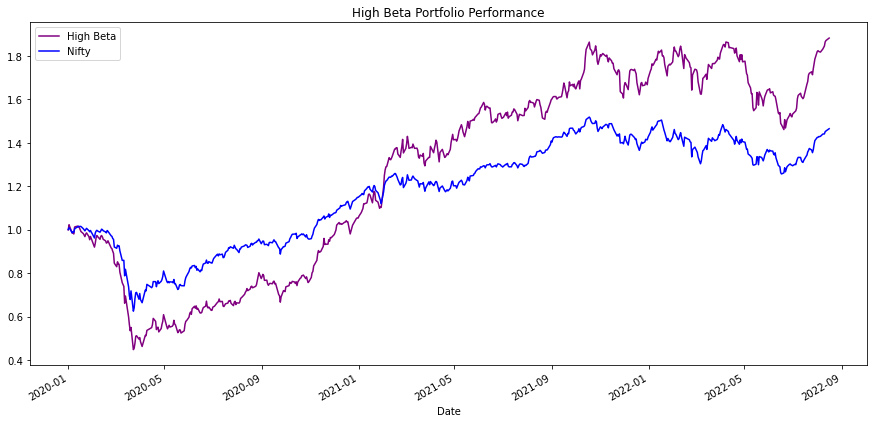

Portfolio Returns:  88.1926569846656
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------
Beta Value:  1.3


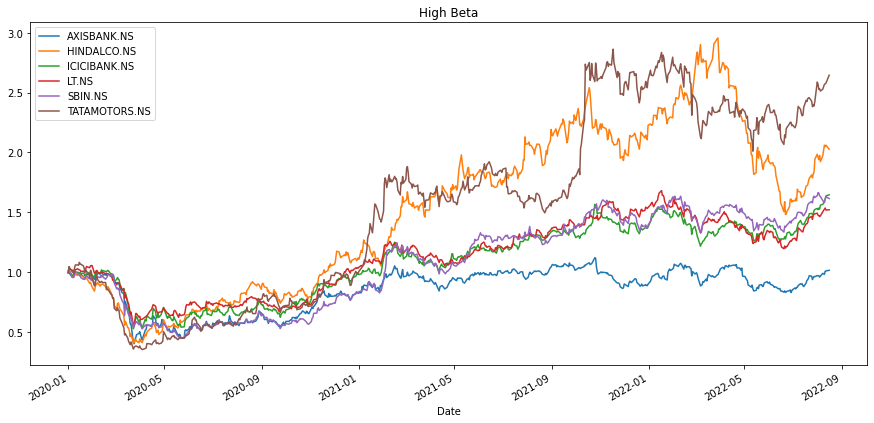

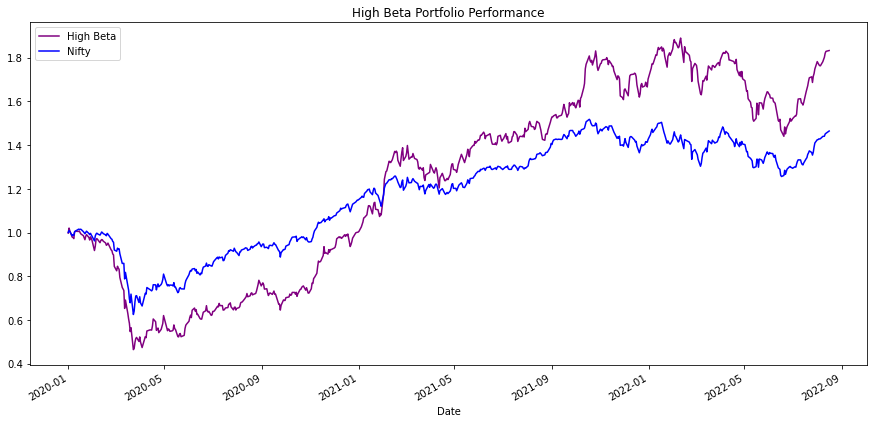

Portfolio Returns:  83.30769881482236
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------
Beta Value:  1.4


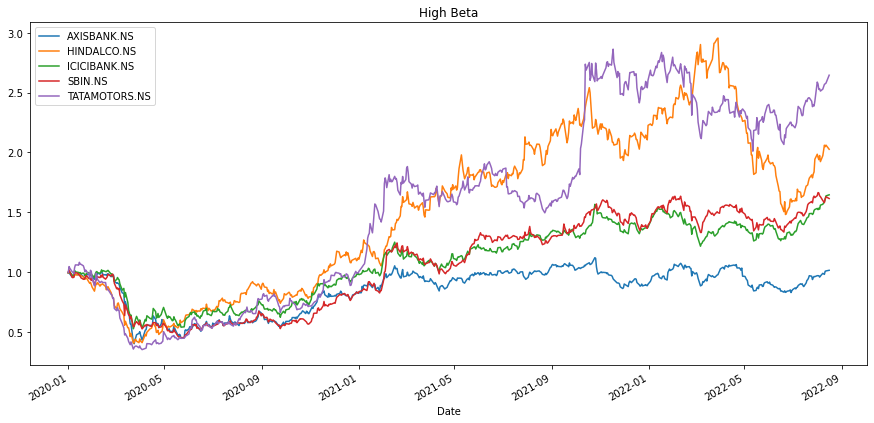

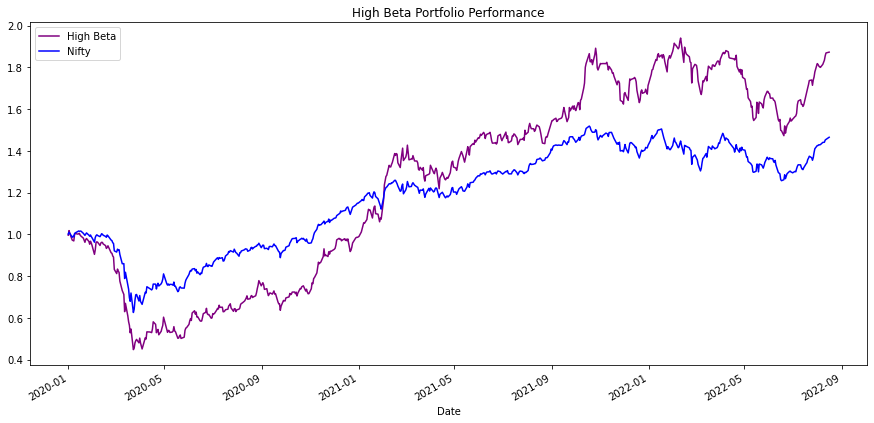

Portfolio Returns:  87.27056702252271
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------
Beta Value:  1.5


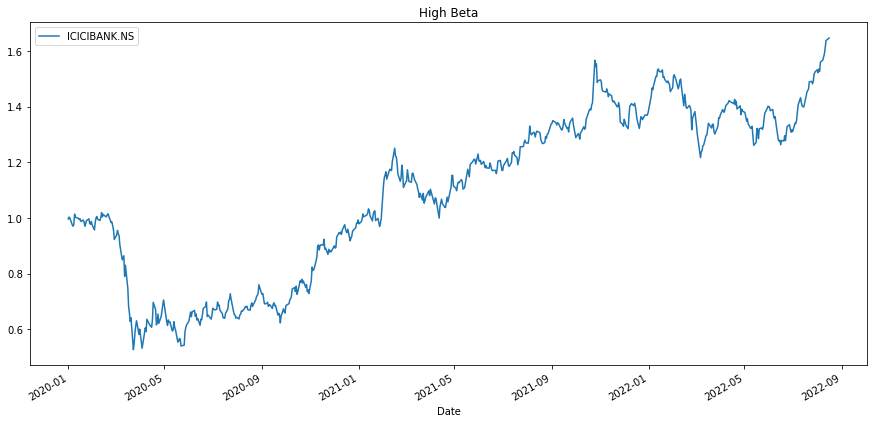

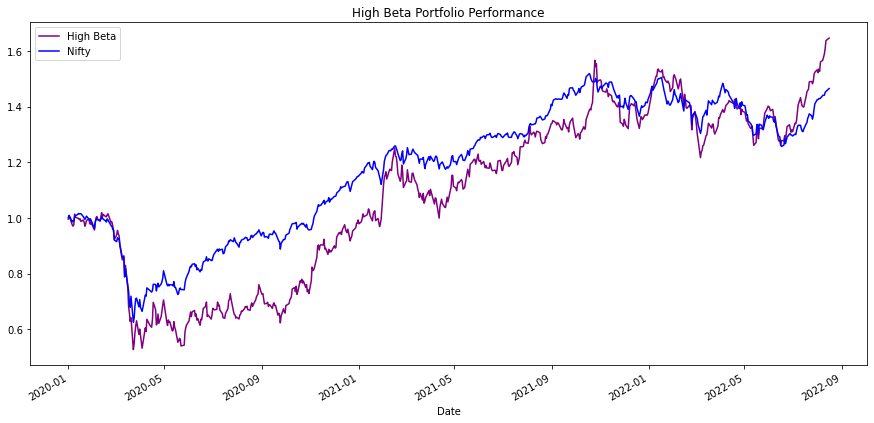

Portfolio Returns:  64.61611560492268
Nifty Returns:  46.48743031274935
-----------------------------------------------------------------------------------


In [47]:
multiple_high_beta()

In [72]:
roe_threshold = 0.20
roce_threshold = 0.20

In [75]:
nifty_fundamental_data = pd.read_csv('Nifty_50_fundamental.csv', index_col=0)

In [76]:
nifty_fundamental_data.head()

,ROCE,ROE
ADANIPORTS.NS,11.20,14.7
APOLLOHOSP.NS,17.80,16.6
ASIANPAINT.NS,29.70,23.2
AXISBANK.NS,5.15,12.7
BAJAJ-AUTO.NS,23.40,19.0


In [179]:
high_roe = nifty_fundamental_data[nifty_fundamental_data.ROE > 15]['ROE'].index

In [180]:
high_roe

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
       'BPCL.NS', 'BRITANNIA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'NESTLEIND.NS', 'ONGC.NS', 'POWERGRID.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'UPL.NS', 'WIPRO.NS'],
      dtype='object')

In [181]:
high_roce = nifty_fundamental_data[nifty_fundamental_data.ROCE > 15]['ROCE'].index

In [182]:
high_roce

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS',
       'EICHERMOT.NS', 'HCLTECH.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'NESTLEIND.NS',
       'ONGC.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS',
       'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'UPL.NS', 'WIPRO.NS'],
      dtype='object')

In [183]:
low_beta

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS',
       'DRREDDY.NS', 'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS',
       'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

In [184]:
filtered_stocks_roe = low_beta & high_roe

C:\Users\Param\AppData\Local\Temp/ipykernel_25464/2987873251.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_stocks_roe = low_beta & high_roe


In [185]:
filtered_stocks_roe

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'DIVISLAB.NS', 'HCLTECH.NS',
       'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS', 'POWERGRID.NS', 'TCS.NS',
       'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

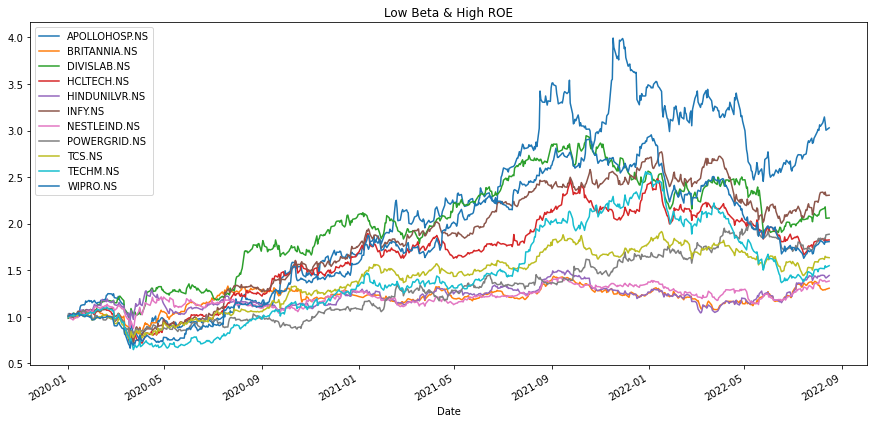

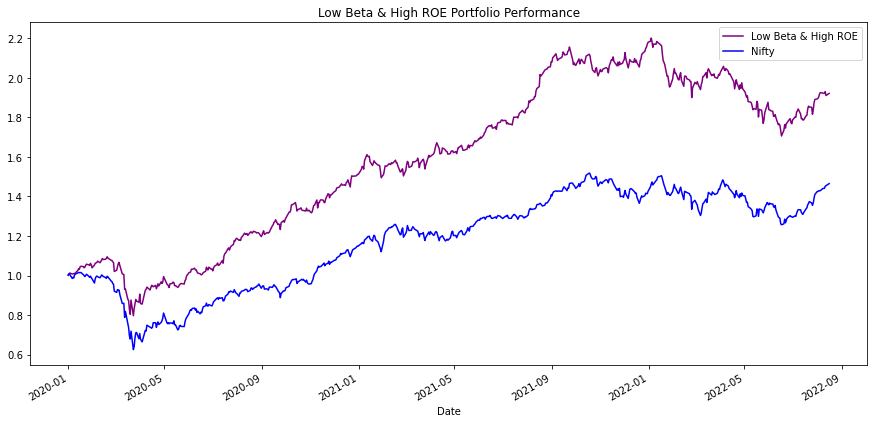

Portfolio Returns:  92.11537610046064
Nifty Returns:  46.48743031274935


In [186]:
p_high_roe = plot_performance(filtered_stocks_roe, 'Low Beta & High ROE')

In [187]:
filtered_stocks_roce = low_beta & high_roce

C:\Users\Param\AppData\Local\Temp/ipykernel_25464/3443877984.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_stocks_roce = low_beta & high_roce


In [188]:
filtered_stocks_roce

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS',
       'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS',
       'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

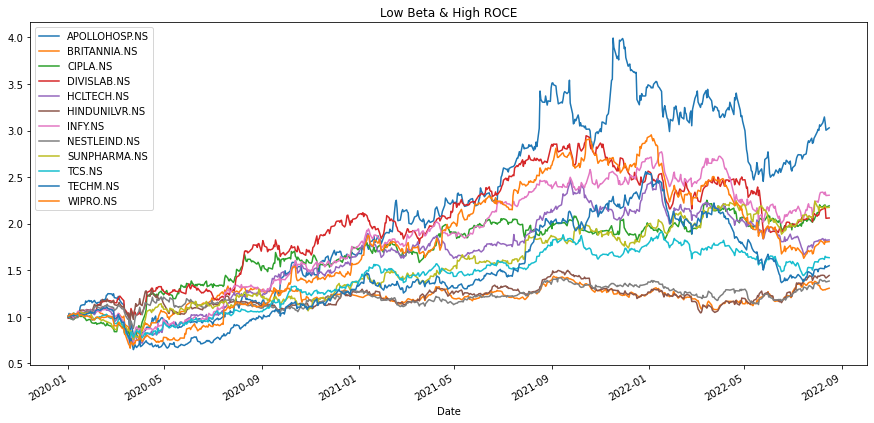

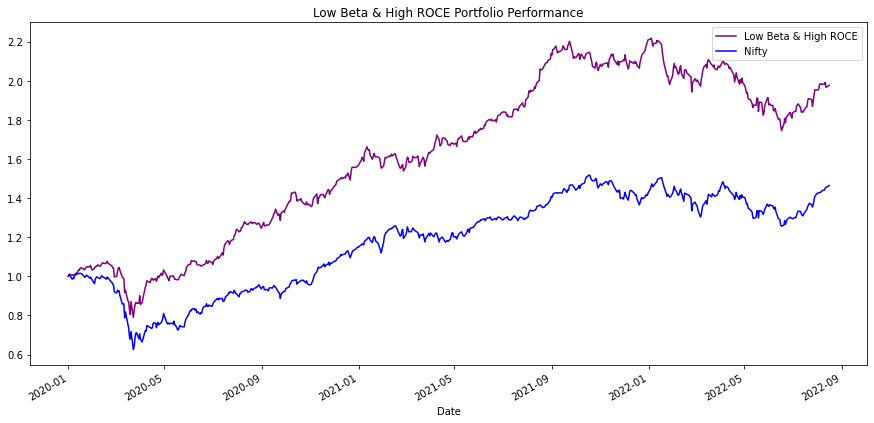

Portfolio Returns:  97.73433135559439
Nifty Returns:  46.48743031274935


In [189]:
p_high_roce = plot_performance(filtered_stocks_roce, 'Low Beta & High ROCE')

In [190]:
filtered_stocks_roe_roce = low_beta & high_roe & high_roce

C:\Users\Param\AppData\Local\Temp/ipykernel_25464/2739874946.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_stocks_roe_roce = low_beta & high_roe & high_roce


In [191]:
filtered_stocks_roe_roce

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'DIVISLAB.NS', 'HCLTECH.NS',
       'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS', 'TCS.NS', 'TECHM.NS',
       'WIPRO.NS'],
      dtype='object')

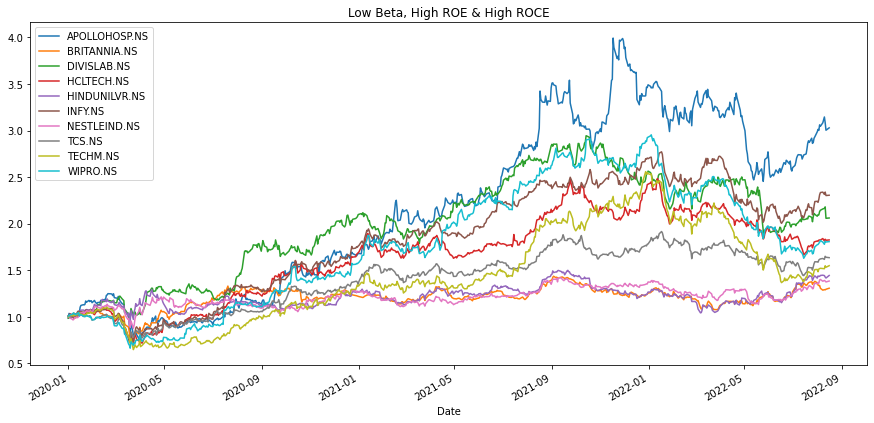

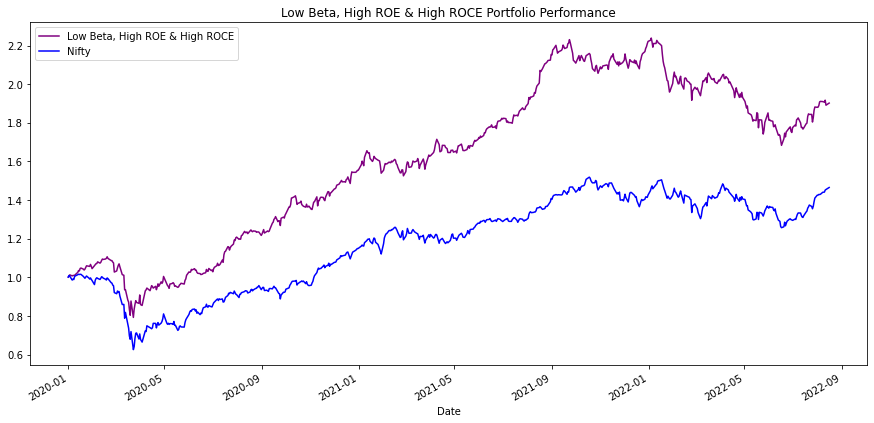

Portfolio Returns:  90.20372224942463
Nifty Returns:  46.48743031274935


In [192]:
p_high_roe_roce = plot_performance(filtered_stocks_roe_roce, 'Low Beta, High ROE & High ROCE')

In [193]:
import pyfolio as pf

D:\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2020-01-01
End date,2022-08-16
Total months,31
,Backtest
Annual return,30.1%
Cumulative returns,97.7%
Annual volatility,21.0%
Sharpe ratio,1.36
Calmar ratio,1.13
Stability,0.82
Max drawdown,-26.6%


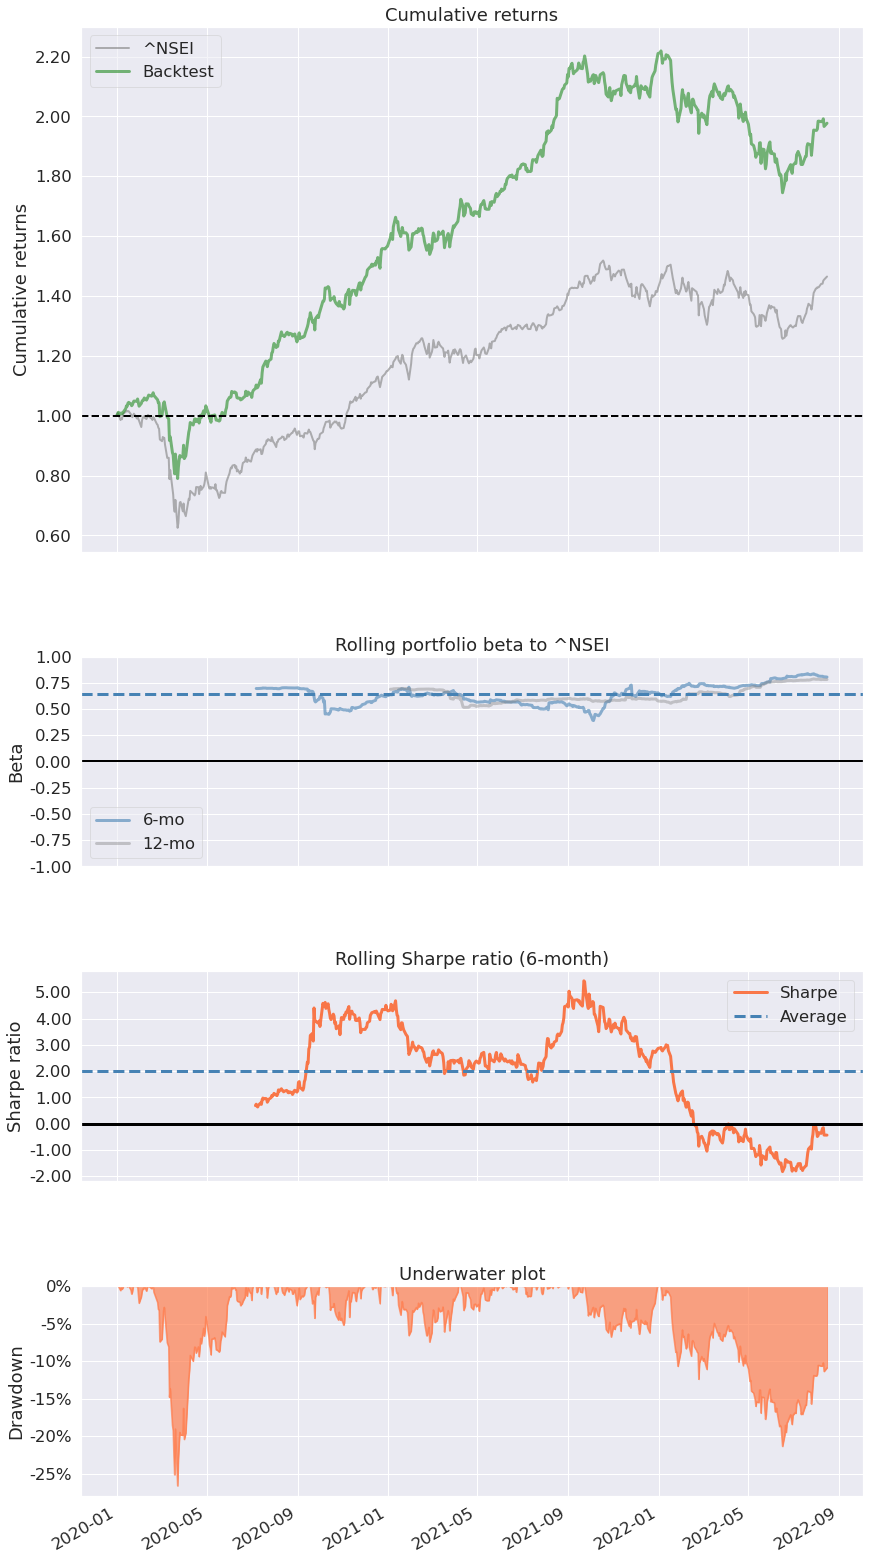

In [194]:
pf.create_simple_tear_sheet(p_high_roce, benchmark_rets=data_pct_change.loc['2020': , '^NSEI'])

In [197]:
high_beta

Index(['ADANIPORTS.NS', 'AXISBANK.NS', 'HINDALCO.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'JSWSTEEL.NS', 'LT.NS', 'SBIN.NS', 'TATAMOTORS.NS'],
      dtype='object')

In [195]:
filtered_stocks_high_beta_roe = high_beta & high_roe

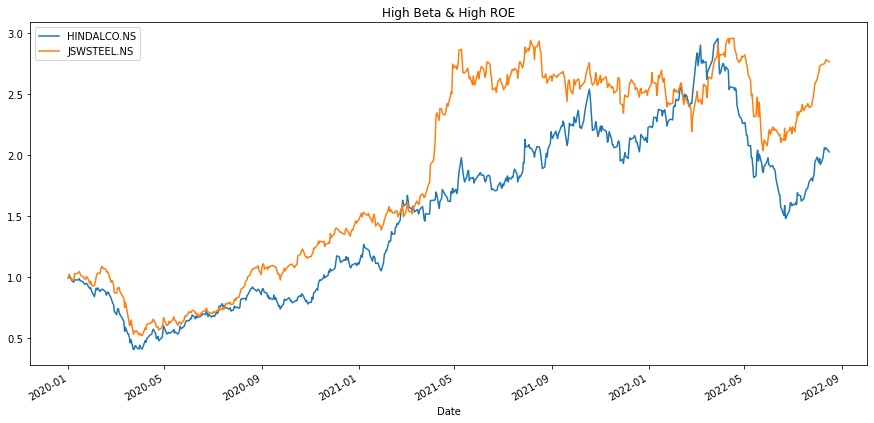

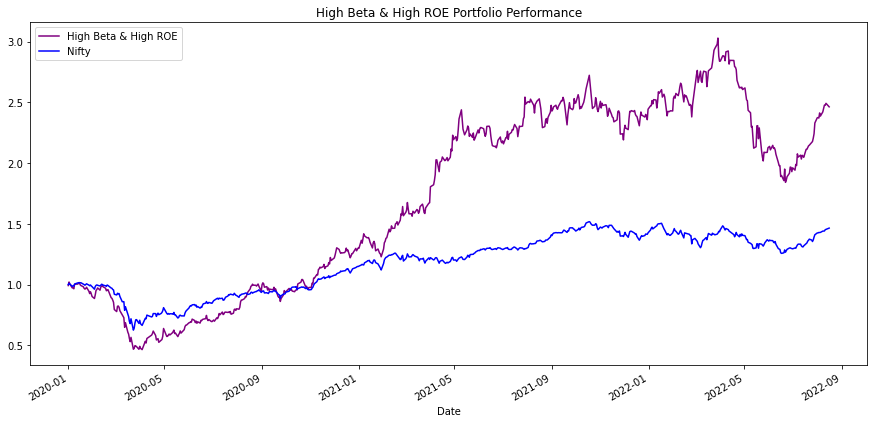

Portfolio Returns:  146.28894873578525
Nifty Returns:  46.48743031274935


In [196]:
p_high_beta_roe = plot_performance(filtered_stocks_high_beta_roe, 'High Beta & High ROE')

In [198]:
filtered_stocks_high_beta_roce = high_beta & high_roce

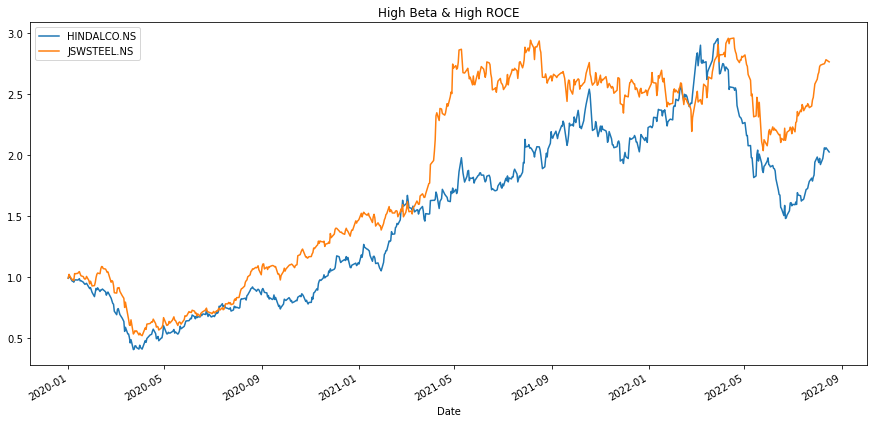

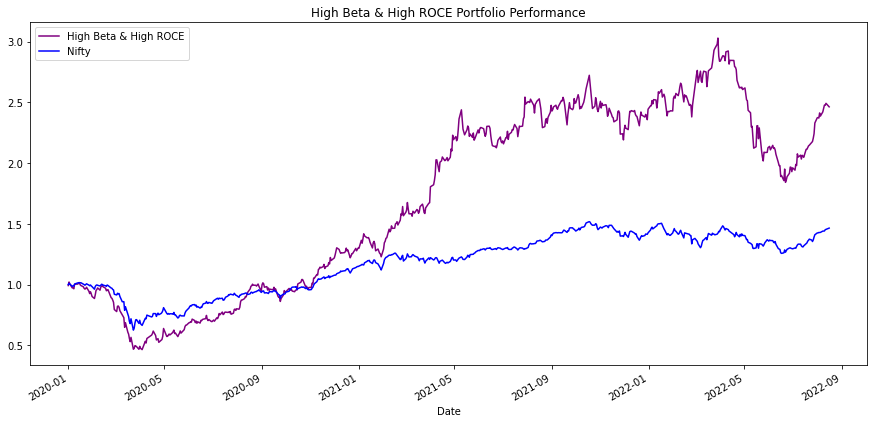

Portfolio Returns:  146.28894873578525
Nifty Returns:  46.48743031274935


In [199]:
p_high_beta_roce = plot_performance(filtered_stocks_high_beta_roce, 'High Beta & High ROCE')

Start date,2020-01-01
End date,2022-08-16
Total months,31
,Backtest
Annual return,41.6%
Cumulative returns,146.3%
Annual volatility,42.8%
Sharpe ratio,1.03
Calmar ratio,0.76
Stability,0.78
Max drawdown,-54.5%


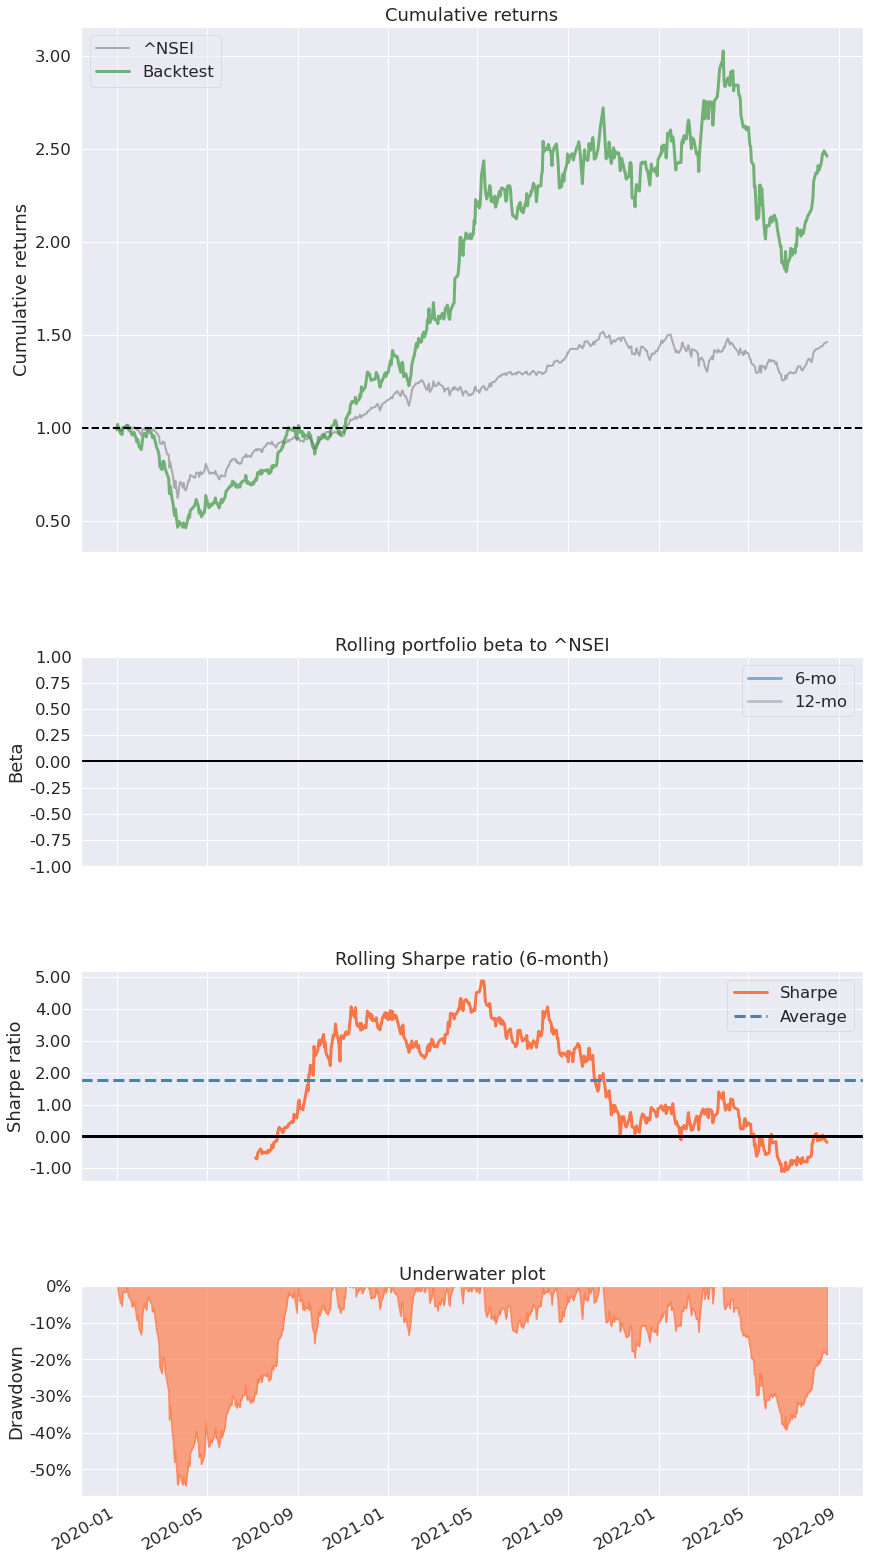

In [200]:
pf.create_simple_tear_sheet(p_high_beta_roce, benchmark_rets=data_pct_change.loc['2020': , '^NSEI'])